In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs

folder_path = 'C:/Users/Artgur/Desktop/Uni/MA/BNN/DataRetrieval/GroundTruth/ERA5_DET_features_2010153_7_48_15.grib'
dt_2t = xr.open_dataset(folder_path, engine='cfgrib', backend_kwargs={'filter_by_keys': {'shortName': '2t','indexpath': 'C:/Users/Artgur/Desktop/Uni/MA/BNN/DataRetrieval/GT_indexes'}}) 
#dt_tp = xr.open_dataset(folder_path, engine='cfgrib', backend_kwargs={'filter_by_keys': {'shortName': 'tp'}})

In [3]:
folder_path = 'C:/Users/Artgur/Desktop/Uni/MA/BNN/DataRetrieval/GroundTruth'
grib_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.grib')]
#datasets =[ xr.open_dataset(file, engine='cfgrib') for file in grib_files]

tp_dataset = [xr.open_dataset(file, engine='cfgrib', backend_kwargs={'filter_by_keys': {'shortName': 'tp'}}) for file in grib_files]
t2_dataset = [xr.open_dataset(file, engine='cfgrib', backend_kwargs={'filter_by_keys': {'shortName': '2t'}}) for file in grib_files]

In [4]:
t2_dataset

[<xarray.Dataset>
 Dimensions:     (time: 744, latitude: 21, longitude: 33)
 Coordinates:
     number      int32 ...
   * time        (time) datetime64[ns] 2010-10-01 ... 2010-10-31T23:00:00
     step        timedelta64[ns] ...
     surface     float64 ...
   * latitude    (latitude) float64 53.0 52.75 52.5 52.25 ... 48.5 48.25 48.0
   * longitude   (longitude) float64 7.0 7.25 7.5 7.75 ... 14.25 14.5 14.75 15.0
     valid_time  (time) datetime64[ns] ...
 Data variables:
     t2m         (time, latitude, longitude) float32 ...
 Attributes:
     GRIB_edition:            1
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts
     history:                 2024-02-12T13:44 GRIB to CDM+CF via cfgrib-0.9.1...,
 <xarray.Dataset>
 Dimensions:     (time: 720, latitude: 21, longitude: 3

Selected data slice is empty. Trying a different slice...


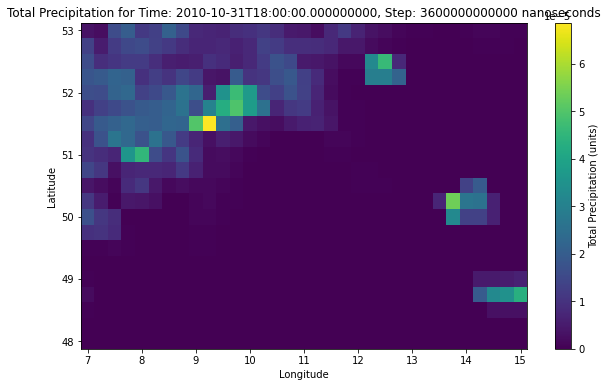

In [5]:
ds = tp_dataset[1]  # Select the first dataset from your list

if np.isnan(ds.tp.isel(time=0, step=0)).all():
    print("Selected data slice is empty. Trying a different slice...")
    # Try a different time or step if the first is empty
    # This is just an example. You might need to dynamically find a slice with data
    data_to_plot = ds.tp.isel(time=2, step=2)
else:
    data_to_plot = ds.tp.isel(time=0, step=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.pcolormesh(ds.longitude, ds.latitude, data_to_plot, shading='auto')
plt.colorbar(label='Total Precipitation (units)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Total Precipitation for Time: {ds.time.values[0]}, Step: {ds.step.values[0]}')
plt.show()

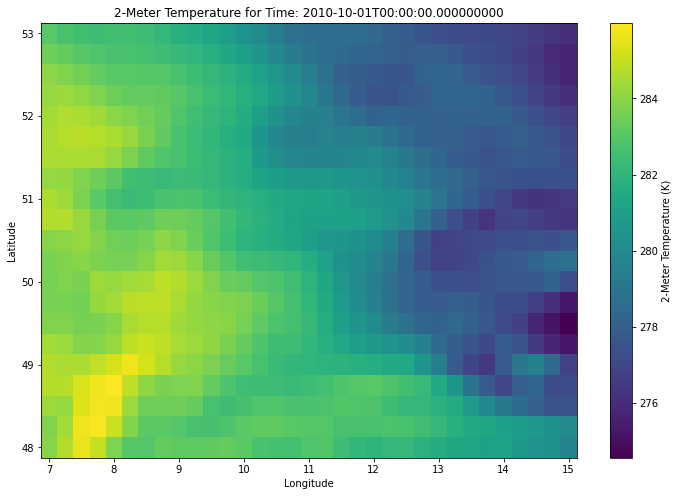

In [25]:
ds = t2_dataset[0]  # Replace 'datasets[0]' with your actual dataset variable

# Selecting the 2-meter temperature ('t2m') data for the first time point
data_to_plot = ds.t2m.isel(time=0)

# Ensure longitude and latitude are correctly set for plotting
longitude = ds.longitude.values
latitude = ds.latitude.values

# Plotting
plt.figure(figsize=(12, 8))

# Plotting using pcolormesh, adjusting for data's orientation if necessary
plt.pcolormesh(longitude, latitude, data_to_plot, shading='nearest')

plt.colorbar(label='2-Meter Temperature (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'2-Meter Temperature for Time: {ds.time.values[0]}')
plt.show()